# Project 1 - Computational Methods

Erin Flaherty

89-297-2445

References: PETE 3061 Class Lectures, Scipython & Numerical Methods Textbook

# Root Finding: Newton Raphson Method

f(x) = x**2-7x+10; initial guess = 1.5, max iterations = 10, error tolerance = 0.001

In [2]:
from math import log, ceil

In [49]:
def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Solution after',n,'iterations')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('No Solution')
            return None
        xn = xn - fxn/Dfxn
    print('No solution found')
    return None

In [51]:
p = lambda x: x**2 - 7*x + 10
Dp = lambda x: 2*x - 7
approx = newton(p,Dp,1.5,1e-3,10)
print('x =', approx)

Solution after 3 iterations
x = 1.999999479600333


# Numerical Integration: Newton-Cotes Formula for Simpson's Rule

Apply numerical integration to determine the approximate integral using the following data

(0.1,2)

(0.2,4)

(0.3,4)

(0.4,5)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
p = 2
q = 4
r = 4
s = 5

In [44]:
def simpson(a,b,N):
    dx = (b-a)/N
    x = [0.1,0.2,0.3,0.4]
    y = [p,q,r,s]
    S = 3*dx/8 * np.sum(y[0:-1:3] + 3*y[1::3] + 3*y[2::3] + y[3::3])
    return S

In [45]:
simpson(0.1,0.4,3)

1.1625

# Numerical Differentiation: Heat Equation

N = 10, step size = 0.001, spatial resolution = 0.1, domain = [0,1]

In [ ]:
initial condition: T(x,0) = 

In [ ]:
Left boundary condition: T(0,t) = 

In [ ]:
Right boundary condition: T(0,t) = 

0 1
10 2
50 3
100 4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


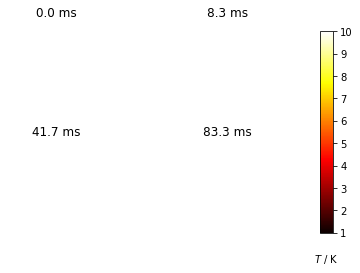

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# plate size, mm
w = h = 0.001
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 3

Tcool, Thot = 1,10

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0,10,50,100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

# Matrix Solvers: Guass-Seidel Method

In [ ]:
max iterations = 30, error tolerance = 0.001

In [10]:
def seidel(a,x,b):
    n = len(a)
    for j in range(0,n):
        d = b[j]
        
        for i in range(0,n):
            if(j != i):
                d -=a[j][i]*x[i]
        x[j] = d / a[j][j]
    return x

In [14]:
n = 4
a = []
b = []

x = [0,0,0,0]
a = [[1,2,3,4],[-4,3,2,-1],[3,5,-9,2]]
b = [2,4,4,5]
print(x)

for i in range(0,30):
    x = seidel(a,x,b)
    print(x)

[0, 0, 0, 0]
[2.0, 4.0, 2.4444444444444446, 0]
[-13.333333333333334, -18.074074074074076, -14.930041152263376, 0]
[82.93827160493828, 121.87105624142663, 94.9077884468831, 0]
[-526.4654778235026, -763.8924960625923, -600.3176570870522, 0]
[3330.737963386341, 4842.52905590649, 3800.095463299052, 0]
[-21083.344501710133, -30643.189644479546, -24052.220191947574, 0]
[133445.0398648018, 193962.86661436746, 152238.3836295825, 0]
[-844638.8841174825, -1227676.1012430317, -963589.0176186231, 0]
[5346121.255341932, 7770555.685534991, 6099015.354855639, 0]
[-33838155.4356369, -49183549.4840863, -38603579.74748246, 0]
[214177840.21062, 311306174.7791483, 244340487.83640015, 0]
[-1355633811.067497, -1970405405.3142626, -1546547607.0859783, 0]
[8580453633.886459, 12471636584.5726, 9788838202.280264, 0]
[-54309787773.98599, -78938942498.83482, -61958230646.68134, 0]
[343752576939.7137, 499642256352.0725, 392163223619.50037, 0]
[-2175774183560.646, -3162474393825.8613, -2482188279979.471, 0]
[137715

In [54]:
def gaussSeidel(iterEqs,x,tol = 1.0e-9):
    omega = 1.0
    k = 10
    p=1
    for i in range(1,501):
        xOld = x.copy()
        x = iterEqs(x,omega)
        dx = sqrt(dot(x-xOld,x-xOld))
        if dx < tol: return x,i,omega
# Compute of relaxation factor after k+p iterations
        if i == k: dx1 = dx
        if i == k + p:
            dx2 = dx
            omega = 2.0/(1.0 + sqrt(1.0 - (dx2/dx1)**(1.0/p)))
    print('Gauss-Seidel failed to converge')

In [58]:
from numarray import zeros,Float64
from gaussSeidel import *


def iterEqs(x,omega):
    n = len(x)
    x[0] = omega*(x[1] - x[n-1])/2.0 + (1.0 - omega)*x[0]
    for i in range(1,n-1):
        x[i] = omega*(x[i-1] + x[i+1])/2.0 + (1.0 - omega)*x[i]
    x[n-1] = omega*(1.0 - x[0] + x[n-2])/2.0 \
            + (1.0 - omega)*x[n-1]
    return x

n = eval(raw_input(’’Number of equations ==> ’’))
x = zeros((n),type=Float64)
x,numIter,omega = gaussSeidel(iterEqs,x)
print('\nNumber of iterations =',numIter)
print('\nRelaxation factor =',omega)
print('\nThe solution is:\n',x
raw_input('\nPress return to exit')

SyntaxError: invalid character in identifier (<ipython-input-58-0101929bf2ff>, line 14)